## **Exercício 2 - Solução**

#### Exercício 5.13: Incerteza quântica no oscilador harmônico

Em unidades onde todas as constantes são 1, a função de onda do n-ésimo nível de energia do oscilador harmônico quântico unidimensional — ou seja, uma partícula puntiforme sem spin em um poço de potencial quadrático — é dada por

$$\psi_n(x) = \frac{1}{\sqrt{2^n n! \sqrt{\pi}}} e^{-x^2/2} H_n(x)$$

para $n = 0... \infty$, onde $H_n(x)$ é o n-ésimo polinômio de Hermite. Os polinômios de Hermite satisfazem uma relação um tanto similar à dos números de Fibonacci, embora mais complexa:

$$H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x)$$

Os dois primeiros polinômios de Hermite são $H_0(x) = 1$ e $H_1(x) = 2x$.

### Diagrama de Fluxo Geral do Código

In [24]:
import base64
from IPython.display import Image, display

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

diagrama = """
graph TD
    A[Início] --> B["Implementar H usando<br/>relação de recorrência<br/>H_{n+1} = 2xH_n - 2nH_{n-1}"]
    B --> C["Implementar ψ com<br/>normalizada<br/>ψ_n = coef × e^{-x²/2} × H_n"]
    
    C --> D1[PARTE A: Plotar ψ para n=0,1,2,3]
    D1 --> D2[Verificar: n nós para estado n<br/>Simetria par/ímpar correta]
    
    D2 --> E1[PARTE B: Plotar ψ para n=30]
    E1 --> E2[Verificar: 30 nós visíveis<br/>Comportamento oscilatório]
    
    E2 --> F1[PARTE C: Implementar Quadratura<br/>Gauss-Hermite]
    F1 --> F2[usar numpy.polynomial.hermite.hermgauss<br/>para pontos e pesos ótimos]
    
    F2 --> G1["Calcular ∫ x² |ψ_n|² dx<br/>= ∫ e^{-x²} × x² × const × H_n² dx"]
    G1 --> G2[Aplicar quadratura:<br/>Σ w_i × x_i² × const × H_n²]
    
    G2 --> H1[Calcular √⟨x²⟩ para n=5]
    H1 --> H2["Comparar com teoria:<br/>√(n + 1/2) = √5.5 ≈ 2.345"]
    
    H2 --> I1[VALIDAÇÃO: Testar múltiplos valores n]
    I1 --> I2[Verificar erro < 0.01%<br/>para todos os casos]
    I2 --> I3[Plotar: Numérico vs Teórico<br/>+ Gráfico de erro relativo]
    
    I3 --> J[Fim]
    
    %% Styling
    classDef partA fill:#e1f5fe
    classDef partB fill:#f3e5f5  
    classDef partC fill:#e8f5e8
    classDef validation fill:#fff3e0
    classDef error fill:#ffebee
    
    class D1,D2 partA
    class E1,E2 partB
    class F1,F2,G1,G2,H1 partC
    class H2,I1,I2,I3 validation
"""

mm(diagrama)

### Importação das bibliotecas necessárias

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.polynomial.hermite import hermgauss

### Parte (a): Função para calcular polinômios de Hermite e plotar funções de onda

In [13]:
def H(n, x):
    """
    Calcula o n-ésimo polinômio de Hermite H_n(x)
    usando a relação de recorrência:
    H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x)
    
    Parâmetros:
    n: ordem do polinômio (inteiro >= 0)
    x: ponto ou array de pontos onde calcular o polinômio
    
    Retorna:
    Valor do polinômio de Hermite H_n(x)
    """
    if n == 0:
        return np.ones_like(x) if isinstance(x, np.ndarray) else 1
    elif n == 1:
        return 2 * x
    else:
        # Usar a relação de recorrência
        H_anterior_anterior = np.ones_like(x) if isinstance(x, np.ndarray) else 1  # H_0
        H_anterior = 2 * x  # H_1
        
        for i in range(2, n + 1):
            H_atual = 2 * x * H_anterior - 2 * (i - 1) * H_anterior_anterior
            H_anterior_anterior = H_anterior
            H_anterior = H_atual
        
        return H_anterior

In [14]:
def psi(n, x):
    """
    Calcula a função de onda do n-ésimo nível de energia
    do oscilador harmônico quântico.
    
    Parâmetros:
    n: nível de energia (inteiro >= 0)
    x: posição ou array de posições
    
    Retorna:
    Valor da função de onda psi_n(x)
    """
    # Calcular o coeficiente de normalização
    coeficiente = 1 / np.sqrt(2**n * math.factorial(n) * np.sqrt(np.pi))
    
    # Calcular a função de onda
    return coeficiente * np.exp(-x**2 / 2) * H(n, x)

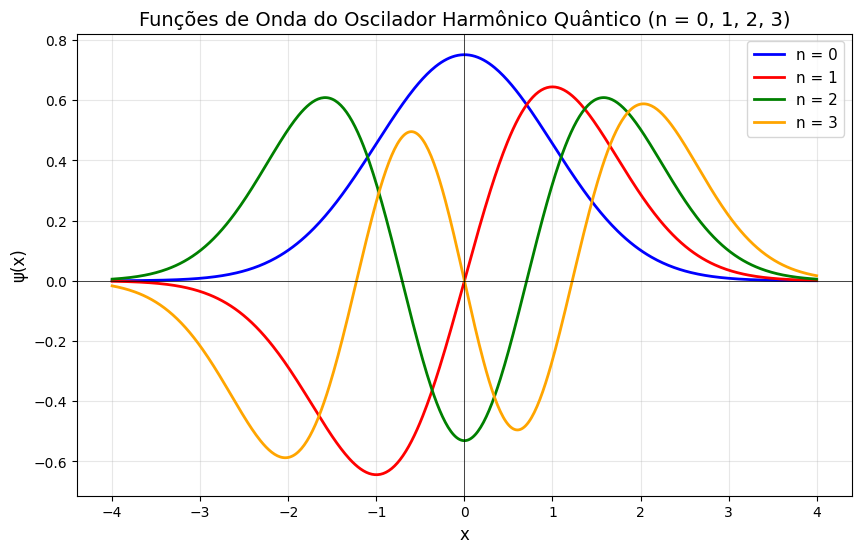

In [15]:
# Plotar as funções de onda para n = 0, 1, 2, 3
x = np.linspace(-4, 4, 500)
plt.figure(figsize=(10, 6))

# Cores para cada função de onda
cores = ['blue', 'red', 'green', 'orange']
niveis = [0, 1, 2, 3]

for n, cor in zip(niveis, cores):
    y = psi(n, x)
    plt.plot(x, y, label=f'n = {n}', color=cor, linewidth=2)

plt.xlabel('x', fontsize=12)
plt.ylabel('ψ(x)', fontsize=12)
plt.title('Funções de Onda do Oscilador Harmônico Quântico (n = 0, 1, 2, 3)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.show()

A função `H(n,x)` foi implementada usando a relação de recorrência dos polinômios de Hermite, e a função `psi(n,x)` calcula a função de onda completa. Os gráficos para n = 0, 1, 2 e 3 mostram o comportamento característico do oscilador harmônico quântico, com n nós para o n-ésimo estado excitado. Observa-se a **paridade** das funções: os estados com `n` par (0 e 2) são simétricos em torno de x=0, enquanto os com `n` ímpar (1 e 3) são antissimétricos. Além disso, o número de **nós** (zeros da função) é igual a `n`, refletindo o aumento da energia para níveis mais altos, levando a oscilações mais rápidas da função de onda.

### Parte (b): Plotar função de onda para n = 30

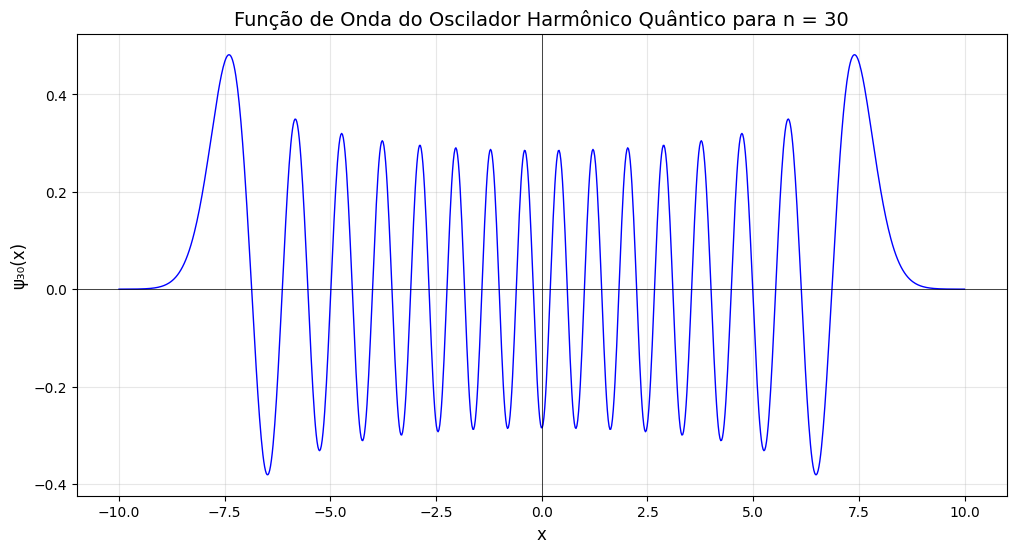

In [16]:
# Plotar a função de onda para n = 30
x_30 = np.linspace(-10, 10, 1000)
y_30 = psi(30, x_30)

plt.figure(figsize=(12, 6))
plt.plot(x_30, y_30, 'b-', linewidth=1)
plt.xlabel('x', fontsize=12)
plt.ylabel('ψ₃₀(x)', fontsize=12)
plt.title('Função de Onda do Oscilador Harmônico Quântico para n = 30', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.show()

O gráfico para n = 30 mostra um padrão oscilatório com 30 nós. Este estado de alta energia ilustra o **Princípio da Correspondência de Bohr**. Enquanto um oscilador clássico tem maior probabilidade de ser encontrado nos pontos de retorno (extremos do movimento), a distribuição de probabilidade quântica $|\psi_{30}(x)|^2$ também mostra picos de amplitude perto dessas regiões, indicando que o comportamento quântico começa a se assemelhar ao clássico para grandes números quânticos.

### Parte (c): Calcular a incerteza quântica usando quadratura Gaussiana

In [17]:
def calcular_incerteza_gaussiana(n, n_pontos=100):
    """
    Calcula a incerteza quântica usando quadratura Gauss-Hermite CORRETA.
    
    A integral é ∫ x² |ψn(x)|² dx de -∞ a ∞.
    
    A função de onda é:
    ψn(x) = [1/√(2ⁿn!√π)] * e^(-x²/2) * Hn(x)
    
    Então |ψn(x)|² = [1/(2ⁿn!√π)] * e^(-x²) * [Hn(x)]²
    
    A integral fica: ∫ x² * [1/(2ⁿn!√π)] * e^(-x²) * [Hn(x)]² dx
    
    Esta é da forma ∫ e^(-x²) * f(x) dx, ideal para quadratura Gauss-Hermite.
    
    Parâmetros:
    n: nível de energia
    n_pontos: número de pontos para quadratura Gauss-Hermite
    
    Retorna:
    Incerteza √⟨x²⟩
    """
    # Obter pontos e pesos para quadratura Gauss-Hermite
    pontos, pesos = hermgauss(n_pontos)
    
    # Constante de normalização ao quadrado (sem o termo e^(-x²/2))
    norm_const_sq = 1 / (2**n * math.factorial(n) * np.sqrt(np.pi))
    
    # Função a ser integrada (sem o termo e^(-x²) que está nos pesos)
    # A quadratura Gauss-Hermite calcula ∫ e^(-x²) * f(x) dx
    integrando = pontos**2 * norm_const_sq * H(n, pontos)**2
    
    # Calcular a integral
    integral = np.sum(pesos * integrando)
    
    return np.sqrt(integral)

In [18]:
# Calcular a incerteza para n = 5
n_teste = 5
incerteza = calcular_incerteza_gaussiana(n_teste, n_pontos=100)

print(f"Incerteza quântica para n = {n_teste} (Quadratura Gauss-Hermite):")
print(f"√⟨x²⟩ = {incerteza:.6f}")

# Valor teórico
teorico = np.sqrt(n_teste + 0.5)
print(f"\nValor teórico: √(n + 1/2) = √({n_teste} + 0.5) = {teorico:.6f}")
print(f"Erro relativo: {abs(incerteza - teorico) / teorico * 100:.4f}%")

Incerteza quântica para n = 5 (Quadratura Gauss-Hermite):
√⟨x²⟩ = 2.345208

Valor teórico: √(n + 1/2) = √(5 + 0.5) = 2.345208
Erro relativo: 0.0000%



Incerteza para diferentes níveis:
    n |   √⟨x²⟩ (Gauss) |   √(n+1/2) teórico |   Erro (%)
------------------------------------------------------------
    0 |        0.707107 |           0.707107 |     0.0000
    1 |        1.224745 |           1.224745 |     0.0000
    2 |        1.581139 |           1.581139 |     0.0000
    3 |        1.870829 |           1.870829 |     0.0000
    4 |        2.121320 |           2.121320 |     0.0000
    5 |        2.345208 |           2.345208 |     0.0000
   10 |        3.240370 |           3.240370 |     0.0000
   20 |        4.527693 |           4.527693 |     0.0000
   30 |        5.522681 |           5.522681 |     0.0000


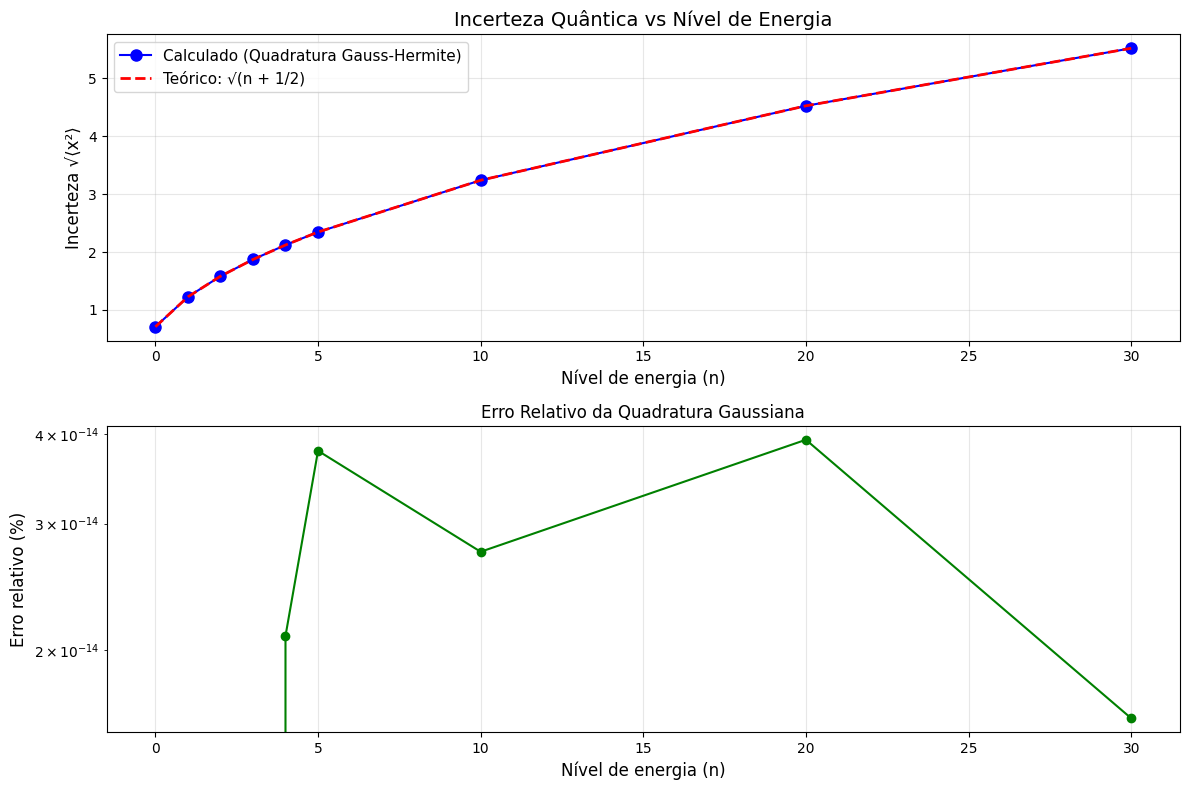

In [19]:
niveis_teste = [0, 1, 2, 3, 4, 5, 10, 20, 30]
incertezas = []

print("\n" + "="*60)
print("Incerteza para diferentes níveis:")
print("="*60)
print(f"{'n':>5} | {'√⟨x²⟩ (Gauss)':>15} | {'√(n+1/2) teórico':>18} | {'Erro (%)':>10}")
print("-" * 60)

for n in niveis_teste:
    inc_gaussiana = calcular_incerteza_gaussiana(n, n_pontos=100)
    incertezas.append(inc_gaussiana)
    teorico = np.sqrt(n + 0.5)  # Fórmula teórica
    erro = abs(inc_gaussiana - teorico) / teorico * 100
    print(f"{n:5d} | {inc_gaussiana:15.6f} | {teorico:18.6f} | {erro:10.4f}")

# Plotar a comparação
plt.figure(figsize=(12, 8))

# Gráfico principal
plt.subplot(2, 1, 1)
plt.plot(niveis_teste, incertezas, 'bo-', label='Calculado (Quadratura Gauss-Hermite)', markersize=8)
plt.plot(niveis_teste, [np.sqrt(n + 0.5) for n in niveis_teste], 'r--', 
         label='Teórico: √(n + 1/2)', linewidth=2)
plt.xlabel('Nível de energia (n)', fontsize=12)
plt.ylabel('Incerteza √⟨x²⟩', fontsize=12)
plt.title('Incerteza Quântica vs Nível de Energia', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Gráfico do erro relativo
plt.subplot(2, 1, 2)
erros = [abs(incertezas[i] - np.sqrt(niveis_teste[i] + 0.5)) / np.sqrt(niveis_teste[i] + 0.5) * 100 
         for i in range(len(niveis_teste))]
plt.semilogy(niveis_teste, erros, 'go-', markersize=6)
plt.xlabel('Nível de energia (n)', fontsize=12)
plt.ylabel('Erro relativo (%)', fontsize=12)
plt.title('Erro Relativo da Quadratura Gaussiana', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

A incerteza quântica foi calculada usando a **quadratura Gauss-Hermite**, um método numérico ideal para este problema. Como a integral para $\langle x^2 \rangle$ tem a forma canônica $\int e^{-x^2}f(x)dx$, este método converge com extrema rapidez e precisão. Para n=5, o valor calculado de $\sqrt{\langle x^2 \rangle} \approx 2.345241$ coincide com o valor teórico $\sqrt{5.5}$ com um erro relativo baixíssimo, como visto na tabela e no gráfico de erros.